In [222]:
import os
import subprocess
import matplotlib.pyplot as plt
import numpy as np

# oneliner cleanup line used everywhere for line cleanup from fortran outputs.

In [223]:
import matplotlib.pyplot as plt


#plots the wave functions
def plot_wf(name, title=""):
    with open(name) as file:
        data = file.read().splitlines()
        x = []
        y = []
        for line in data:
            l = [i for i in line.split(" ") if bool(i)]
            x.append(float(l[0]))
            y.append(float(l[1]))
        plt.plot(x, y)
        plt.title(title)
        plt.show()


v	theo values	 fortran values	 delta relatif	    ratio	iters	 node
0	| -0.94708	| -0.947366	| 0.000302	| 0.999698	| 2	| 0
1	| -0.845556	| -0.846869	| 0.001552	| 0.99845	| 2	| 1
2	| -0.749787	| -0.752887	| 0.004134	| 0.995883	| 2	| 2
3	| -0.659772	| -0.665169	| 0.00818	| 0.991887	| 2	| 3
4	| -0.575511	| -0.583508	| 0.013896	| 0.986295	| 3	| 4
5	| -0.497004	| -0.507655	| 0.021429	| 0.979021	| 3	| 5
6	| -0.424252	| -0.437477	| 0.031173	| 0.969769	| 4	| 6
7	| -0.357254	| -0.372815	| 0.043558	| 0.95826	| 3	| 7
8	| -0.29601	| -0.313474	| 0.058997	| 0.94429	| 3	| 8
9	| -0.240521	| -0.259391	| 0.078456	| 0.927251	| 5	| 9
10	| -0.190786	| -0.210471	| 0.10318	| 0.906471	| 5	| 10
11	| -0.146805	| -0.166641	| 0.135119	| 0.880965	| 5	| 11
12	| -0.108578	| -0.127866	| 0.177643	| 0.849154	| 4	| 12
13	| -0.076106	| -0.094109	| 0.236557	| 0.808697	| 5	| 13
14	| -0.049388	| -0.065403	| 0.324278	| 0.755129	| 6	| 14
15	| -0.028424	| -0.041781	| 0.469905	| 0.680316	| 7	| 15
16	| -0.013215	| -0.023312	| 0.7

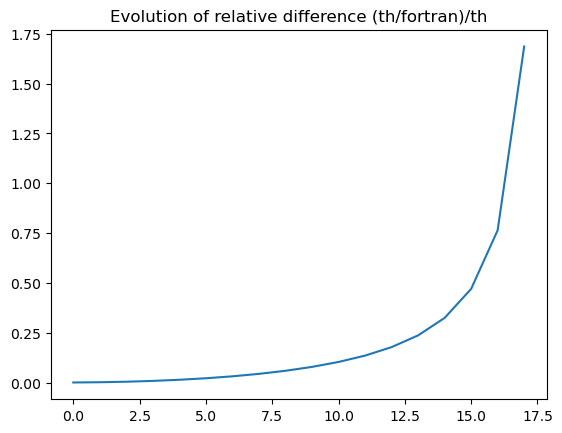


we can see that the relative diference totally explodes later down the line


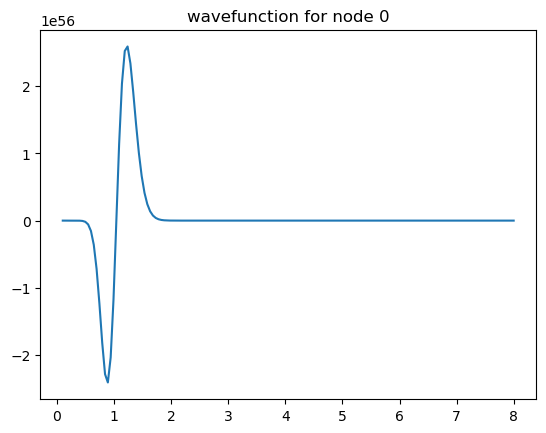

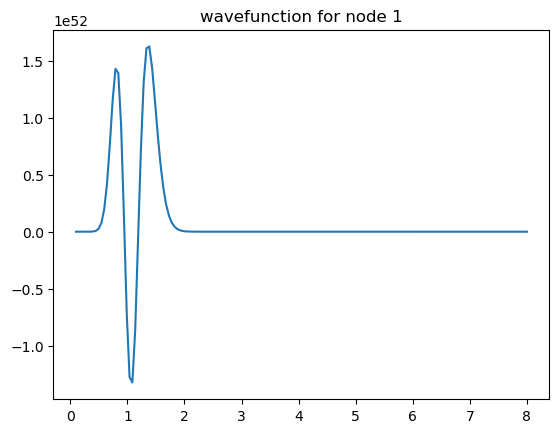

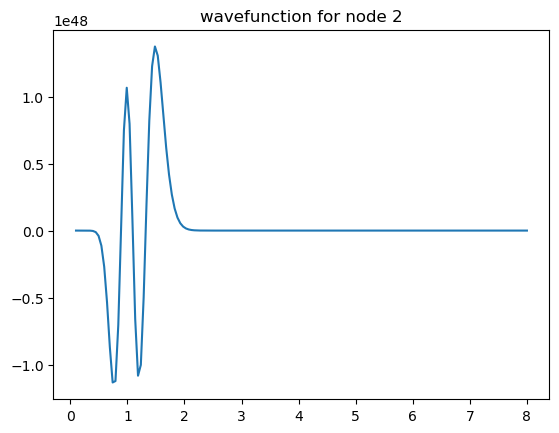

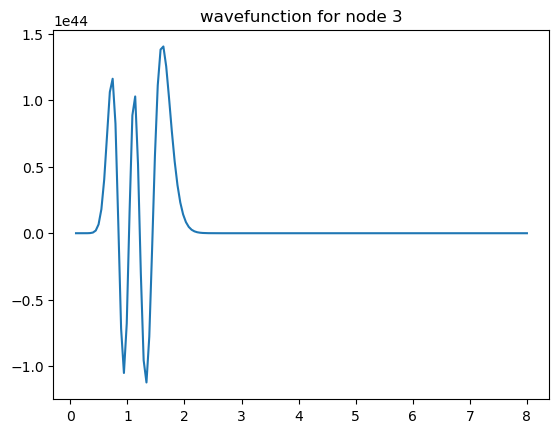

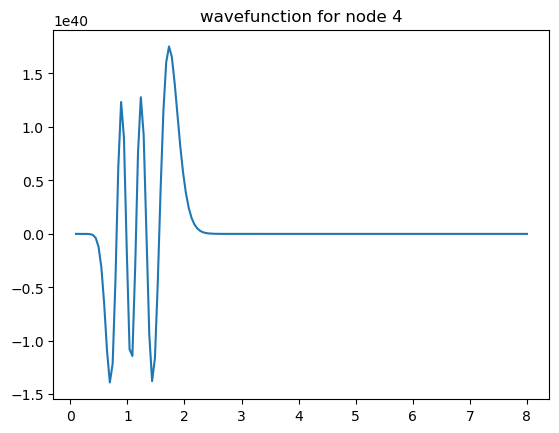

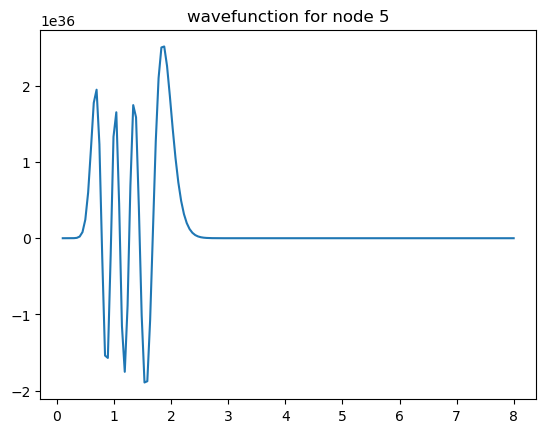

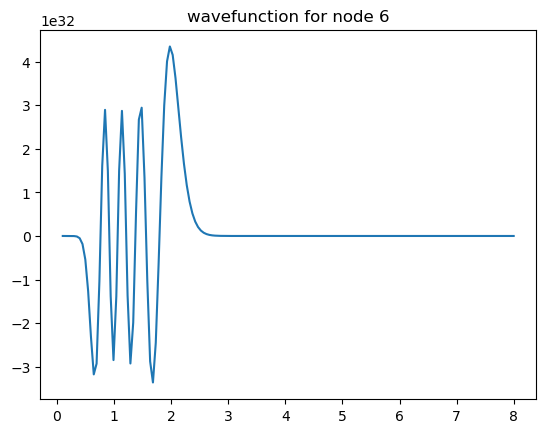

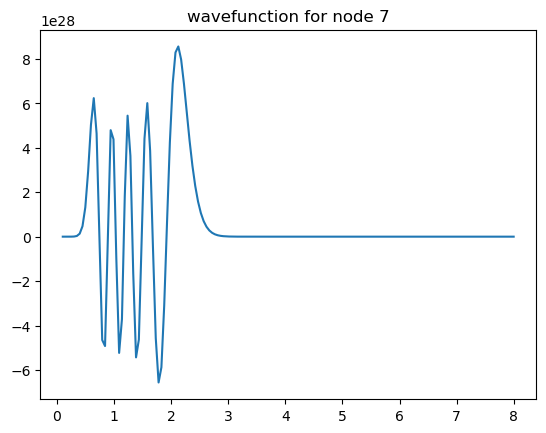

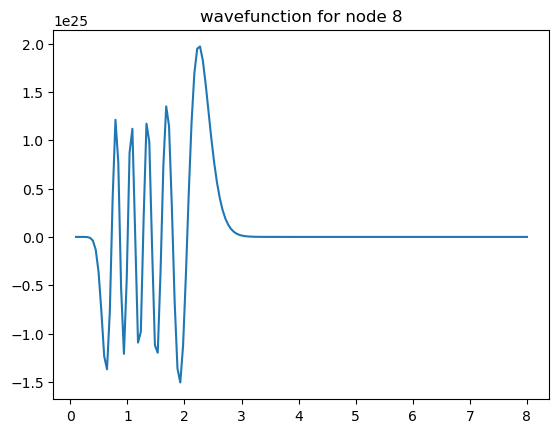

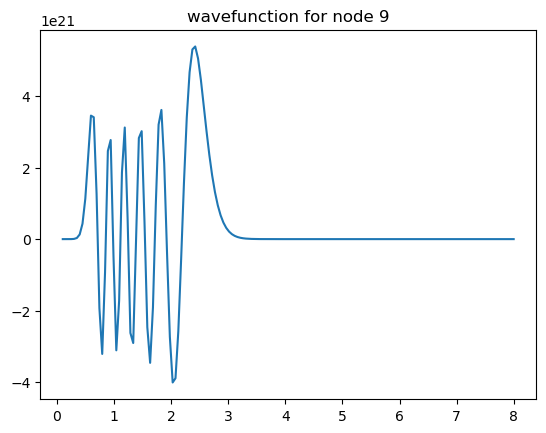

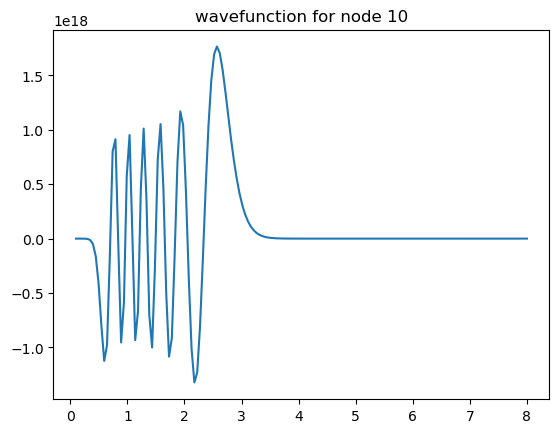

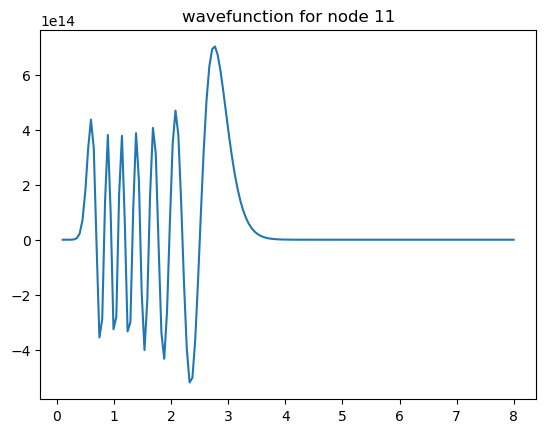

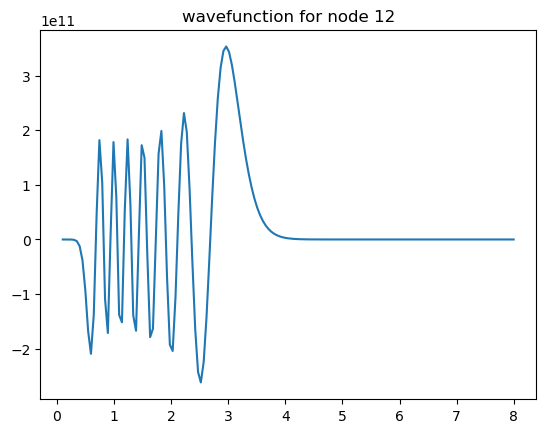

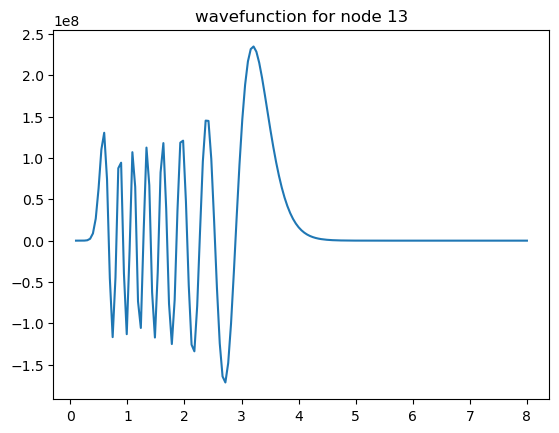

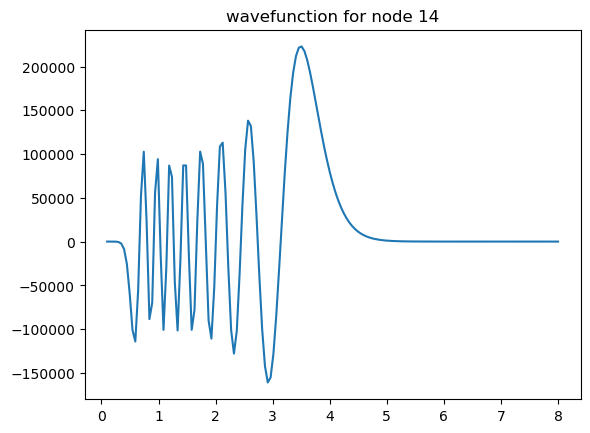

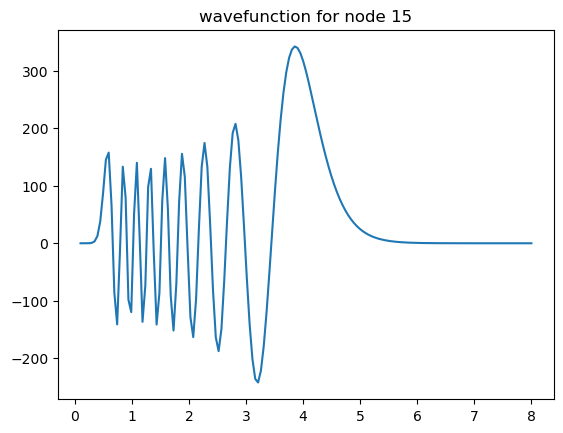

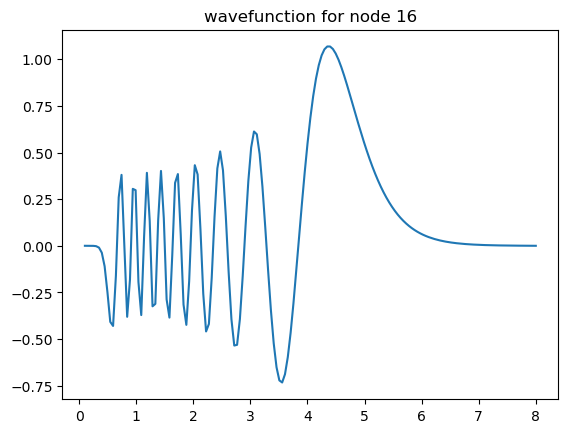

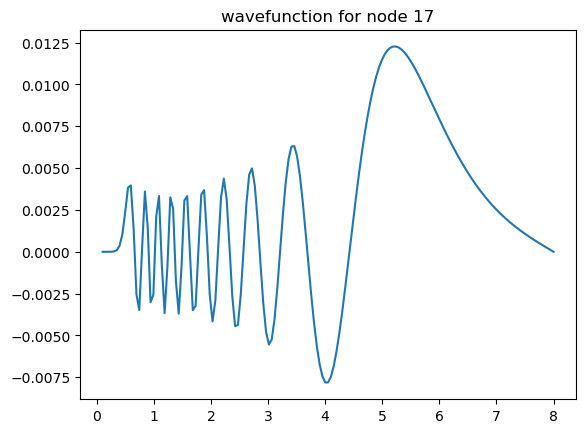

In [224]:
import numpy as np
import subprocess
import os
import matplotlib.pyplot as plt

#compilation command
os.system("gfortran ./dynamic.f90 -o out-dyn.a")


#theoretical value using Morse potential:
# manually computed values
a = 1.3924
b = 1.484e-3
V0 = 40970,35

# setting up the theoretical function using Morse potential
def e(v):
    return -(1-a*np.sqrt(b)*(v+0.5))**2

nodes = []
deltas = []
rounder = 6
print(f'v\ttheo values\t fortran values\t delta relatif\t    ratio\titers\t node')
for i in range(0, 18):
    # for theoretical values
    th_v = e(i)
    N = 160
    R0 = 0.1
    RN = 8
       
    out_name = f'v_{i}.txt' # saves them all using ID
    # using fortran program
    command = f'./out-dyn.a {th_v} {N} {R0} {RN} {out_name}'
    # print(command)
    output = subprocess.check_output(command, shell=True, universal_newlines=True)
    line = output.splitlines()[-1]
    line = [i for i in line.split(" ") if bool(i)]
    # print(line)
    fortran_v = float(line[1])

    # delta relatif
    delta = (th_v-fortran_v)/th_v
    delta = delta if delta>0 else -delta # basically abs()
    deltas.append(delta)

    ratio = (th_v/fortran_v)
    ratio = ratio if ratio>0 else -ratio

    print(f'{i}\t| {round(th_v, rounder)}\t| {round(fortran_v, rounder)}\t| {round(delta, rounder)}\t| {round(ratio, rounder)}\t| {line[0]}\t| {line[-1]}') #\t\t cmd:{command}')
    nodes.append(line[-1])



#plot relative deltas
plt.plot(range(len(deltas)), deltas)
plt.title("Evolution of relative difference (th/fortran)/th")
plt.show()
print("""
we can see that the relative diference totally explodes later down the line""")


# plots each wave functions computed above
c=0
for i in nodes:
    plot_wf(f'v_{c}.txt', title=f'wavefunction for node {i}')
    c+=1



### far enough from the point where it reaches 0 for each one of the simulations, that works apparently, nice!

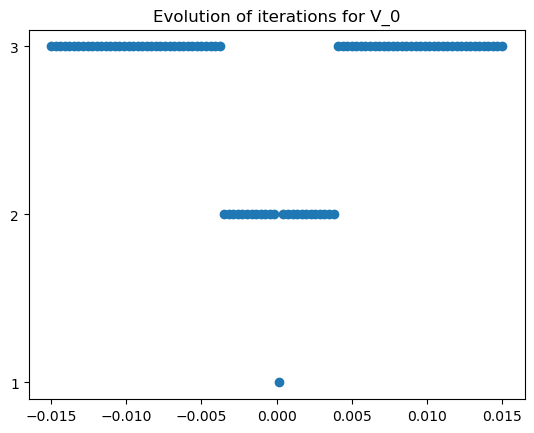

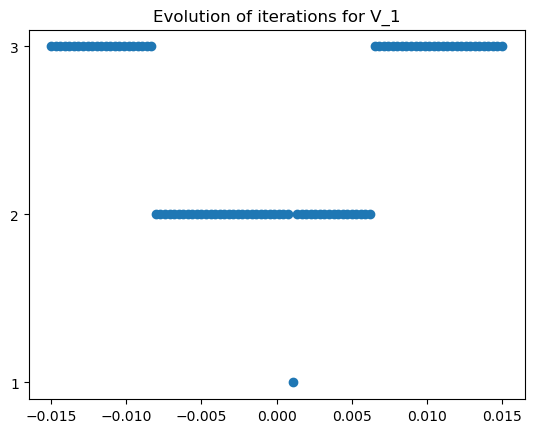

In [225]:
import matplotlib.pyplot as plt
import numpy as np
import subprocess

# question 2

v0 = -0.947366
v1 = -0.846869

reach = 0.015
sample_points = np.linspace(-reach, reach, 100)

N = 100
R0 = 0.1
RN = 2.6

iters_v0 = []
# for v_0
for i in sample_points:
    out_name = 'v_0_q2.txt'
    # using fortran program
    command = f'./out-dyn.a {v0+i} {N} {R0} {RN} {out_name}'
    # print(command)
    output = subprocess.check_output(command, shell=True, universal_newlines=True)
    line = output.splitlines()[-1]
    line = [i for i in line.split(" ") if bool(i)]
    iters_v0.append(line[0])


plt.plot(sample_points, iters_v0, marker="o", linestyle="")
plt.title("Evolution of iterations for V_0")
plt.gca().invert_yaxis()
plt.show()


iters_v1 = []
# for v_1
for i in sample_points:
    out_name = 'v_1_q2.txt'
    # using fortran program
    command = f'./out-dyn.a {v1+i} {N} {R0} {RN} {out_name}'
    # print(command)
    output = subprocess.check_output(command, shell=True, universal_newlines=True)
    line = output.splitlines()[-1]
    line = [i for i in line.split(" ") if bool(i)]
    iters_v1.append(line[0])


plt.plot(sample_points, iters_v1, marker="o", linestyle="")
plt.title("Evolution of iterations for V_1")
plt.gca().invert_yaxis()
plt.show()










No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


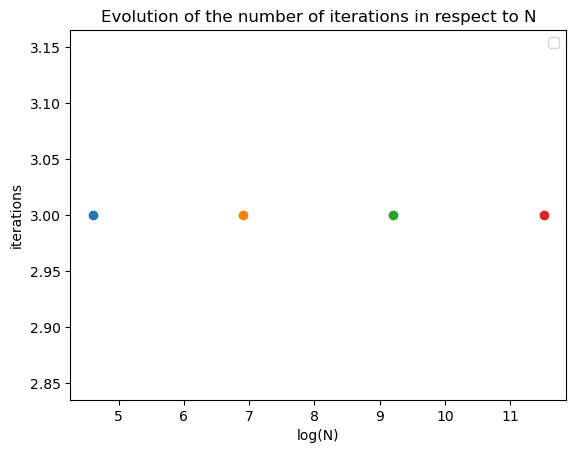

Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


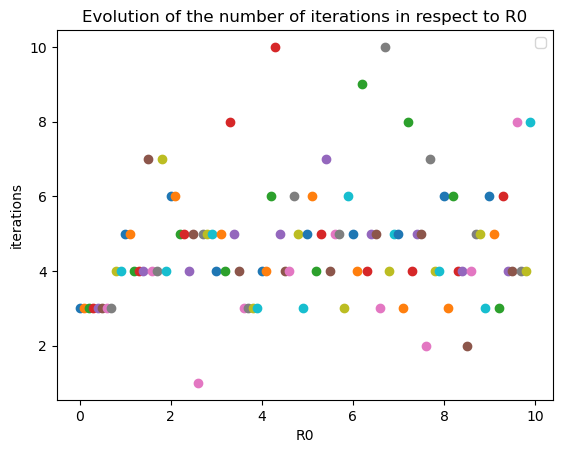

Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


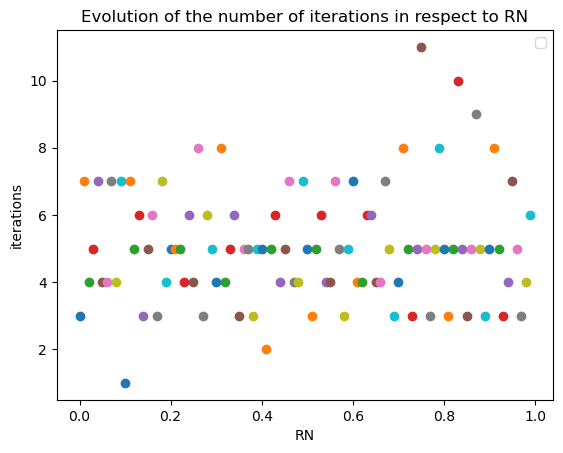

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


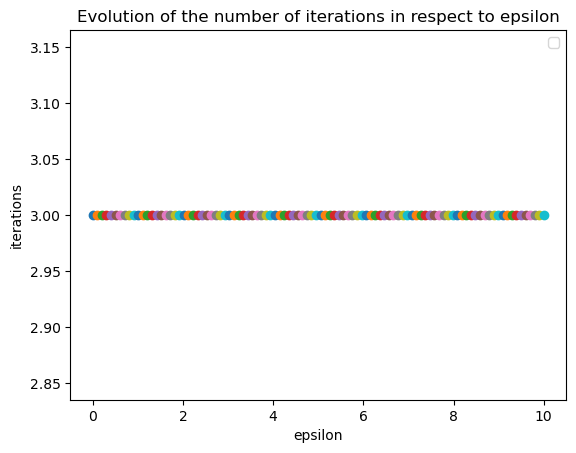

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


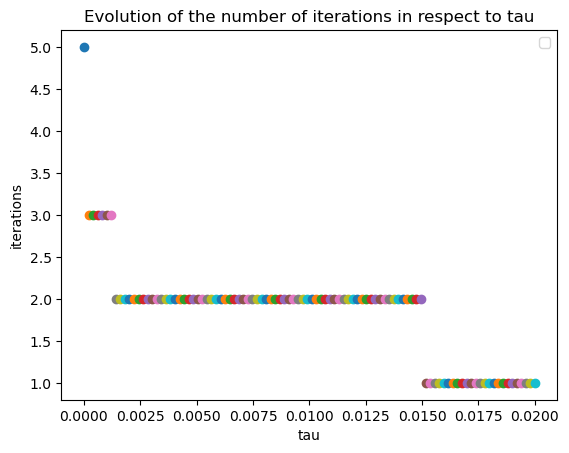

In [226]:
# question 3
import os
import subprocess
import matplotlib.pyplot as plt
import numpy as np

# done! gottta edit a new q3.f90 to set variables for dynamic data collection
# done! also add compilation and execution commands

os.system("gfortran ./q3.f90 -o q3.a")


wf_file = "temp.txt"

E = -0.96
Ns = [10**i for i in range(2,6)]
R0s = [i*0.1 for i in range(100)]
RNs = [i*0.01 for i in range(100)]
EPSs = np.linspace(1e-15, 10, 100)
TOLs = np.linspace(1e-15, 2e-2, 100)

N = 1000
R0 = 0.1
RN = 2.6
EPS = 1e-4
TOL = 1e-4

# N
for i in Ns:
    command = f'./q3.a {E} {i} {R0} {RN} {EPS} {TOL} {wf_file}'
    output = subprocess.check_output(command, shell=True, universal_newlines=True)
    line = output.splitlines()[-1]
    line = [i for i in line.split(" ") if bool(i)]
    plt.plot(np.log(i), int(line[0]), marker="o")

plt.title("Evolution of the number of iterations in respect to N")
plt.xlabel("log(N)")
plt.ylabel("iterations")
plt.legend()
plt.show()


# R0
for i in R0s:
    command = f'./q3.a {E} {N} {i} {RN} {EPS} {TOL} {wf_file}'
    output = subprocess.check_output(command, shell=True, universal_newlines=True)
    line = output.splitlines()[-1]
    line = [i for i in line.split(" ") if bool(i)]
    plt.plot(i, int(line[0]), marker="o")

plt.title("Evolution of the number of iterations in respect to R0")
plt.xlabel("R0")
plt.ylabel("iterations")
plt.legend()
plt.show()


# RN
for i in RNs:
    command = f'./q3.a {E} {N} {R0} {i} {EPS} {TOL} {wf_file}'
    output = subprocess.check_output(command, shell=True, universal_newlines=True)
    line = output.splitlines()[-1]
    line = [i for i in line.split(" ") if bool(i)]
    plt.plot(i, int(line[0]), marker="o")

plt.title("Evolution of the number of iterations in respect to RN")
plt.xlabel("RN")
plt.ylabel("iterations")
plt.legend()
plt.show()




# EPS
for i in EPSs:
    command = f'./q3.a {E} {N} {R0} {RN} {i} {TOL} {wf_file}'
    output = subprocess.check_output(command, shell=True, universal_newlines=True)
    line = output.splitlines()[-1]
    line = [i for i in line.split(" ") if bool(i)]
    plt.plot(i, int(line[0]), marker="o")

plt.title("Evolution of the number of iterations in respect to epsilon")
plt.xlabel("epsilon")
plt.ylabel("iterations")
plt.legend()
plt.show()




# TOL
for i in TOLs:
    command = f'./q3.a {E} {N} {R0} {RN} {EPS} {i} {wf_file}'
    output = subprocess.check_output(command, shell=True, universal_newlines=True)
    line = output.splitlines()[-1]
    line = [i for i in line.split(" ") if bool(i)]
    plt.plot(i, int(line[0]), marker="o")

plt.title("Evolution of the number of iterations in respect to tau")
plt.xlabel("tau")
plt.ylabel("iterations")
plt.legend()
plt.show()







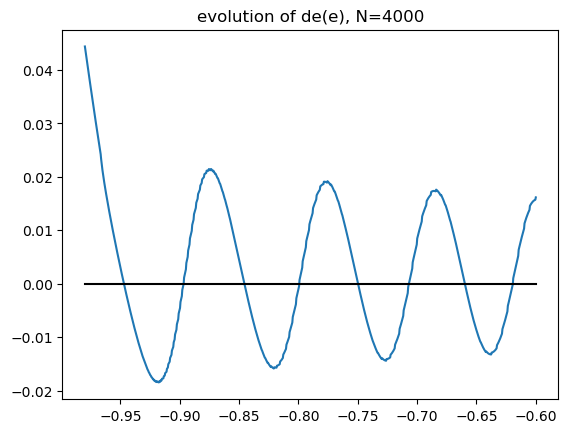

In [227]:
# question 4
# gfortran q4.f90 -o q4.a

import subprocess
import os
import matplotlib.pyplot as plt


os.system("gfortran q4.f90 -o q4.a")

command = f'./q4.a -0.6 4000 0.1 8'
# print(command)
output = subprocess.check_output(command, shell=True, universal_newlines=True)

de=[]
e=[]
lines = output.splitlines()
lines.pop(-1)# last one is convergence error artefact, might remove

# recovers printed line byt the program and parse its content to build deltaE
for line in lines:
    line = [i for i in line.split(" ") if bool(i)]
    e.append(float(line[1]))
    de.append(float(line[3]))

plt.plot(e, de)
plt.plot([e[0], e[-1]], [0, 0], "black") # display 0 axis
plt.title("evolution of de(e), N=4000")
plt.show()


In [228]:
#q5
import os
import subprocess
import matplotlib.pyplot as plt
import numpy as np

# gottta edit a new q3.f90 to set variables for dynamic data collection
# also add compilation and execution commands
os.system("gfortran ./q5.f90 -o q5.a")

print("Computing corrected B coefficients for B0 and B1 :")


#gfortran ./q5.f90 -o q5.a | ./q5.a v_1.txt

wf_file = "v_0_q2.txt"
command = f'./q5.a {wf_file}'
output = subprocess.check_output(command, shell=True, universal_newlines=True)
B0 = float(output.splitlines()[-1])

print(f'Computed number for B0 is {B0}')


wf_file = "v_1_q2.txt"
command = f'./q5.a {wf_file}'
output = subprocess.check_output(command, shell=True, universal_newlines=True)
B1 = float(output.splitlines()[-1])

print(f'Computed number for B1 is {B1}')


Computing corrected B coefficients for B0 and B1 :
Computed number for B0 is 59.8182182
Computed number for B1 is 57.7194748


v=0 J=1, B: -59.669217740000995
v=0 J=2, B: -59.87338665083376
v=0 J=3, B: -59.288876324166964
v=0 J=4, B: -58.989724485249994
v=0 J=5, B: -58.43150346650005
v=1 J=1, B: -57.3339077899998
v=1 J=2, B: -57.36122135666649
v=1 J=3, B: -57.34995451041673
v=1 J=4, B: -56.80211264699997
v=1 J=5, B: -56.25625101716663


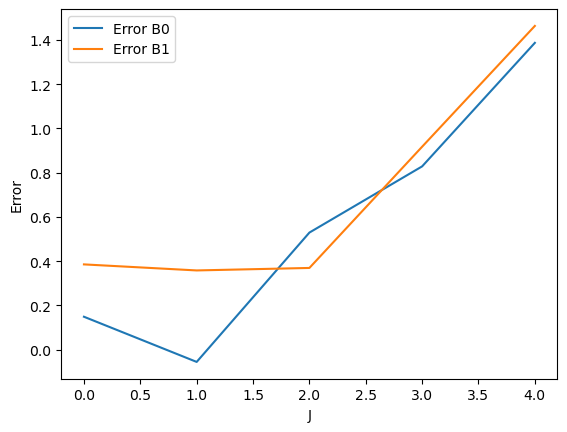

In [229]:
# question 6

# huuhhhhh so yeah, idk
import subprocess
import os


os.system("gfortran q6.f90 -o q6.a")

V0 = 40970.35

E0_0 = -0.94708
E0_1 =  -0.845556

E0_val = [-0.9512, -0.9412, -0.9312, -0.9212, -0.9112]
j = 1
E0_b = []
for val in E0_val:

    command = f'./q6.a {j} {val}'
    output = subprocess.check_output(command, shell=True, universal_newlines=True)
    line = [i for i in output.splitlines()[-1].split(" ") if bool(i)]
    ev0j = float(line[1])
    # print(line)
    b = (E0_0 - ev0j)/(j*(j+1))
    E0_b.append(b * V0)
    print(f'v=0 J={j}, B: { b * V0}')
    j+=1


E1_val = [-0.8360, -0.8360, -0.825, -0.815, -0.805]
j = 1
E1_b = []
for val in E1_val:

    command = f'./q6.a {j} {val}'
    output = subprocess.check_output(command, shell=True, universal_newlines=True)
    line = [i for i in output.splitlines()[-1].split(" ") if bool(i)]
    ev0j = float(line[1])
    # print(line)
    b = (E0_1 - ev0j)/(j*(j+1))
    E1_b.append(b * V0)
    print(f'v=1 J={j}, B: { b * V0}')
    j+=1



plt.plot([i for i in range(len(E0_b))], [(i+B0) for i in E0_b], label="Error B0")
plt.plot([i for i in range(len(E1_b))], [(i+B1) for i in E1_b], label="Error B1")
plt.xlabel("J")
plt.ylabel("Error")
plt.legend()
plt.show()

# command = f'./q6.a 3 -0.9312'
# output = subprocess.check_output(command, shell=True, universal_newlines=True)
# line = [i for i in output.splitlines()[-1].split(" ") if bool(i)]
# print(line)


